# 手写阿拉伯数字识别

本项目将使用 TensorFlow 和 Keras 构建一个卷积神经网络（CNN）模型来识别手写阿拉伯数字。以下是各个步骤的详细说明。

In [291]:
# 导入必要的库
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io
from skimage.transform import resize

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 步骤1：加载 MNIST 手写阿拉伯数字数据

In [292]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 步骤2：数据清理（此步骤无需进行）

# 步骤3：特征工程，将特征缩放到(0, 1)之间

In [293]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 步骤4：数据分割（已在加载MNIST数据时完成）

# 步骤5：建立改进的模型结构

In [294]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 步骤6：使用数据增强进行模型训练

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.7654 - loss: 0.7474 - val_accuracy: 0.9602 - val_loss: 0.1274
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9609 - loss: 0.1171 - val_accuracy: 0.9627 - val_loss: 0.1212
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9626 - loss: 0.1237 - val_accuracy: 0.9807 - val_loss: 0.0610
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9453 - loss: 0.1073 - val_accuracy: 0.9807 - val_loss: 0.0606
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 65s 137ms/step - accuracy: 0.9708 - loss: 0.0949 - val_accuracy: 0.9864 - val_loss: 0.0406
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0575 - val_accuracy: 0.9869 - val_loss: 0.0371
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9785 - loss: 0.0712 - val_accuracy: 0.9844 - val_loss: 0.0416
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1426 - val_ac

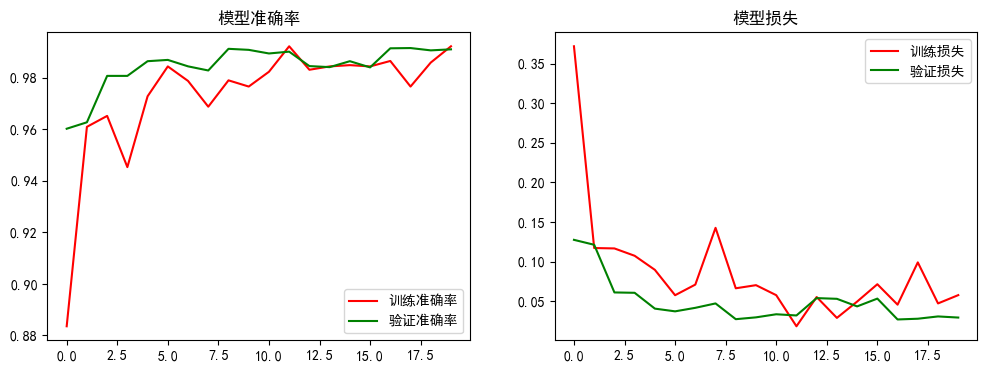

In [295]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

# 训练模型
history = model.fit(datagen.flow(x_train_norm.reshape(-1, 28, 28, 1), y_train, batch_size=128),
                    steps_per_epoch=len(x_train_norm) // 128,
                    epochs=20,
                    validation_data=(x_test_norm.reshape(-1, 28, 28, 1), y_test))

# 绘制训练过程的准确率和损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r', label='训练准确率')
plt.plot(history.history['val_accuracy'], 'g', label='验证准确率')
plt.title('模型准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r', label='训练损失')
plt.plot(history.history['val_loss'], 'g', label='验证损失')
plt.title('模型损失')
plt.legend()
plt.show()

# 步骤7：评分

In [296]:
score = model.evaluate(x_test_norm.reshape(-1, 28, 28, 1), y_test, verbose=0)
print(f'测试准确率: {score[1]:.4f}')

测试准确率: 0.9910


# 步骤8：评估

In [297]:
predictions = np.argmax(model.predict(x_test_norm.reshape(-1, 28, 28, 1)), axis=-1)
print('实际值    :', y_test[:20])
print('预测值    :', predictions[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
实际值    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
预测值    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# 步骤9：模型部署

In [298]:
model.save('data/DigitSense_model_improved.keras')

# 步骤10：新数据预测

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


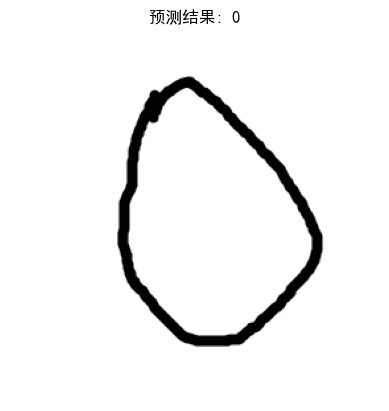

图像 0.png 的预测结果: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


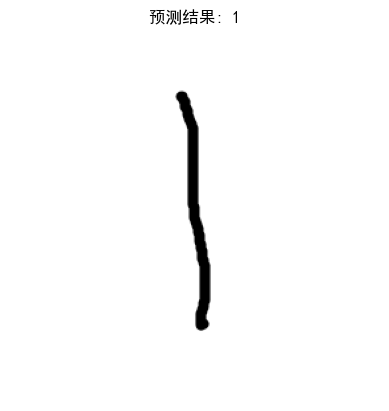

图像 1.png 的预测结果: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


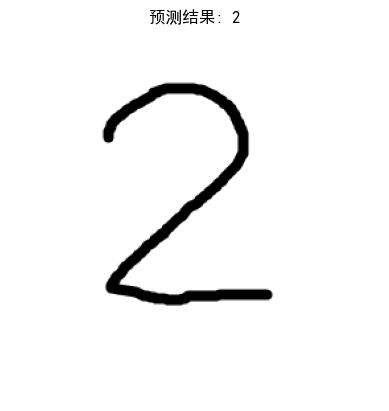

图像 2.png 的预测结果: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


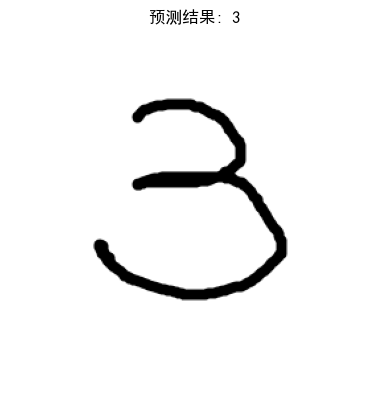

图像 3.png 的预测结果: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


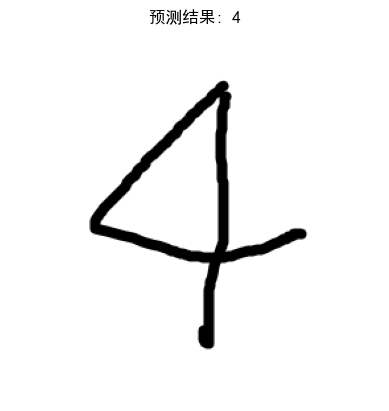

图像 4.png 的预测结果: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


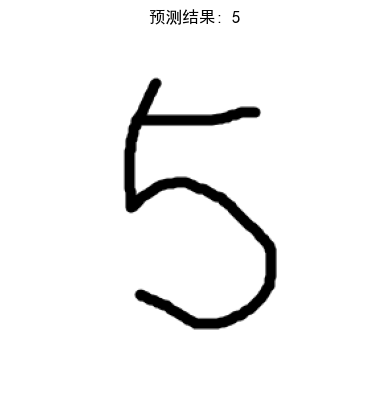

图像 5.png 的预测结果: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


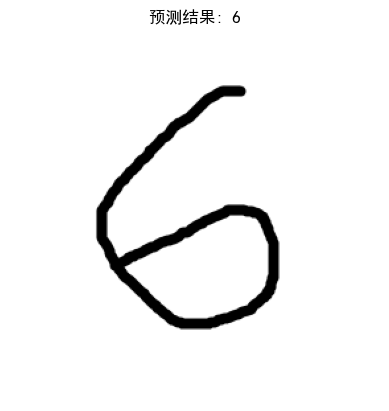

图像 6.png 的预测结果: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


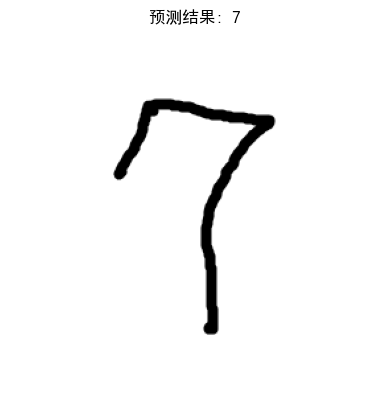

图像 7.png 的预测结果: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


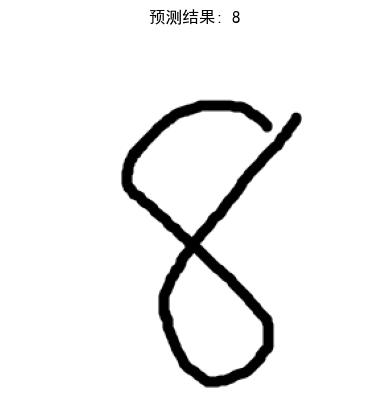

图像 8.png 的预测结果: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


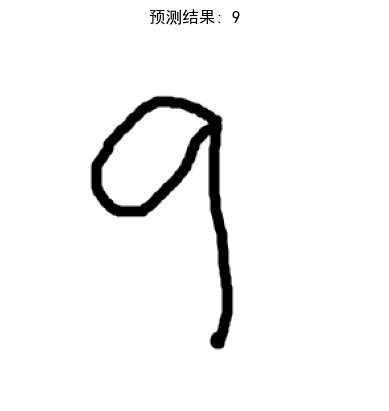

图像 9.png 的预测结果: 9


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,000 (2.73 MB)

 Trainable params: 238,410 (931.29 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 476,822 (1.82 MB)

In [299]:
def predict_digit(file_path):
    # 读取图像并转为单色
    image = io.imread(file_path, as_gray=True)
    
    # 缩放为 (28, 28) 大小的图像
    image_resized = resize(image, (28, 28), anti_aliasing=True)
    
    # 反转颜色并reshape
    X = np.abs(1 - image_resized).reshape(1, 28, 28, 1)
    
    # 预测
    prediction = np.argmax(model.predict(X), axis=-1)
    
    # 显示图像和预测结果
    plt.imshow(image, cmap='gray')
    plt.title(f'预测结果: {prediction[0]}')
    plt.axis('off')
    plt.show()

    return prediction[0]

# 测试自定义图像
for i in range(10):
    file_path = f'./data/images/{i}.png'
    predicted_digit = predict_digit(file_path)
    print(f'图像 {i}.png 的预测结果: {predicted_digit}')

# 显示模型汇总信息
model.summary()